# Different Approaches For Processing
### Author: Hristo Panov

## 00 Prerequisite and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore") 

# Custom Imports
import sys
sys.path.insert(0, '..')

from utils.const_folders import folder_paths
from utils.function_freqs import freqs

%matplotlib inline

## 01 Read Data

In [2]:
# Read From CSV
df = pd.read_csv(
    f"{folder_paths.path}/data_cleaned.csv"
    ,sep=","
    ,index_col=None
)

## 02 Basic Checks

In [3]:
# Columns and Rows
print('The dataset contains {one} rows and {two} columns'.format(one=df.shape[0],two=df.shape[1]))
print('Those columns are {one}'.format(one=df.columns.to_list()))

The dataset contains 7043 rows and 21 columns
Those columns are ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [4]:
# Preview
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4406,3714-XPXBW,Female,No,No,No,37,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),78.90,2976.95,No
1765,0409-WTMPL,Female,No,Yes,No,58,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),110.65,6526.65,No
4127,8626-XHBIE,Male,No,No,Yes,56,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.80,1424.20,No
6580,7696-AMHOD,Female,No,Yes,Yes,49,Yes,No,DSL,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20,No
4942,2626-URJFX,Male,No,Yes,Yes,4,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,50.90,225.60,Yes


In [5]:
#Set the index of the data set to be equal to the customerID
df.set_index('customerID',inplace=True)

In [6]:
#Explore Feature types
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## 03 Data Preprocessing

### 03.1 Categorical Features

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


In [8]:
#Set the dependant variable - Create a Good/Bad Flag, which is reversed of the Chur
df["GB_FLAG"] = np.where(df['Churn']== "Yes", 0, 1)
# Drop the Churn Feature since it is no longer needed
df.drop(columns=['Churn'],inplace=True)
#Set the dependant variable
dependant_flag = "GB_FLAG"

In [9]:
# Transform to Dummies
df = pd.get_dummies(df, columns=df.select_dtypes(include="object").columns)

In [10]:
# Make All Columns Upper
df.columns = df.columns.str.upper()
# Replace "-" with "_"
df.rename(columns=lambda s: s.replace("-", "_"), inplace=True)
df.rename(columns=lambda s: s.replace(" ", "_"), inplace=True)
df.rename(columns=lambda s: s.replace("(", ""), inplace=True)
df.rename(columns=lambda s: s.replace(")", ""), inplace=True)

In [11]:
df.columns

Index(['TENURE', 'MONTHLYCHARGES', 'TOTALCHARGES', 'GB_FLAG', 'GENDER_FEMALE',
       'GENDER_MALE', 'SENIORCITIZEN_NO', 'SENIORCITIZEN_YES', 'PARTNER_NO',
       'PARTNER_YES', 'DEPENDENTS_NO', 'DEPENDENTS_YES', 'PHONESERVICE_NO',
       'PHONESERVICE_YES', 'MULTIPLELINES_NO',
       'MULTIPLELINES_NO_PHONE_SERVICE', 'MULTIPLELINES_YES',
       'INTERNETSERVICE_DSL', 'INTERNETSERVICE_FIBER_OPTIC',
       'INTERNETSERVICE_NO', 'ONLINESECURITY_NO',
       'ONLINESECURITY_NO_INTERNET_SERVICE', 'ONLINESECURITY_YES',
       'ONLINEBACKUP_NO', 'ONLINEBACKUP_NO_INTERNET_SERVICE',
       'ONLINEBACKUP_YES', 'DEVICEPROTECTION_NO',
       'DEVICEPROTECTION_NO_INTERNET_SERVICE', 'DEVICEPROTECTION_YES',
       'TECHSUPPORT_NO', 'TECHSUPPORT_NO_INTERNET_SERVICE', 'TECHSUPPORT_YES',
       'STREAMINGTV_NO', 'STREAMINGTV_NO_INTERNET_SERVICE', 'STREAMINGTV_YES',
       'STREAMINGMOVIES_NO', 'STREAMINGMOVIES_NO_INTERNET_SERVICE',
       'STREAMINGMOVIES_YES', 'CONTRACT_MONTH_TO_MONTH', 'CONTRACT_ONE_Y

In [12]:
df.replace({False: 0, True: 1}, inplace=True)

In [13]:
df.sample(5)

,TENURE,MONTHLYCHARGES,TOTALCHARGES,GB_FLAG,GENDER_FEMALE,GENDER_MALE,SENIORCITIZEN_NO,SENIORCITIZEN_YES,PARTNER_NO,PARTNER_YES,...,STREAMINGMOVIES_YES,CONTRACT_MONTH_TO_MONTH,CONTRACT_ONE_YEAR,CONTRACT_TWO_YEAR,PAPERLESSBILLING_NO,PAPERLESSBILLING_YES,PAYMENTMETHOD_BANK_TRANSFER_AUTOMATIC,PAYMENTMETHOD_CREDIT_CARD_AUTOMATIC,PAYMENTMETHOD_ELECTRONIC_CHECK,PAYMENTMETHOD_MAILED_CHECK
customerID,,,,,,,,,,,,,,,,,,,,,
0848-ZGQIJ,16,94.65,1461.15,1,1,0,1,0,0,1,...,1,1,0,0,0,1,1,0,0,0
9779-DPNEJ,22,80.15,1790.65,1,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
5696-CEIQJ,67,103.15,6895.50,1,0,1,1,0,0,1,...,1,0,0,1,1,0,1,0,0,0
6696-YDAYZ,16,20.50,290.55,1,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,0,1
5442-UTCVD,3,91.85,257.05,0,0,1,1,0,1,0,...,1,1,0,0,1,0,0,0,1,0


### 03.2 Numeric Features

In [14]:
#Tenure
freqs.CAR_CONT(df,'TENURE',dependant_flag,20)

,TENURE_bands,N_CASES,GOOD_RATE,PERC_CASES,N_GOOD,N_BAD,PERC_GOOD,PERC_BAD,BAD_RATE,GB_ODDS
0,"(-0.001, 1.0]",624,0.391026,8.86,244.0,380.0,4.72,20.33,60.90,0.64
1,"(1.0, 2.0]",238,0.483193,3.38,115.0,123.0,2.22,6.58,51.68,0.93
2,"(2.0, 3.0]",200,0.530000,2.84,106.0,94.0,2.05,5.03,47.00,1.13
3,"(3.0, 6.0]",419,0.553699,5.95,232.0,187.0,4.48,10.01,44.63,1.24
4,"(6.0, 9.0]",373,0.627346,5.30,234.0,139.0,4.52,7.44,37.27,1.68
5,"(9.0, 12.0]",332,0.656627,4.71,218.0,114.0,4.21,6.10,34.34,1.91
6,"(12.0, 15.0]",284,0.651408,4.03,185.0,99.0,3.58,5.30,34.86,1.87
7,"(15.0, 20.0]",408,0.718137,5.79,293.0,115.0,5.66,6.15,28.19,2.55
8,"(20.0, 24.0]",332,0.759036,4.71,252.0,80.0,4.87,4.28,24.10,3.15
9,"(24.0, 29.0]",359,0.782730,5.10,281.0,78.0,5.43,4.17,21.73,3.60


In [15]:
df.TENURE.describe().T

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: TENURE, dtype: float64

In [16]:
#MONTHLYCHARGES
freqs.CAR_CONT(df,'MONTHLYCHARGES',dependant_flag,5)

,MONTHLYCHARGES_bands,N_CASES,GOOD_RATE,PERC_CASES,N_GOOD,N_BAD,PERC_GOOD,PERC_BAD,BAD_RATE,GB_ODDS
0,"(18.249, 25.05]",1420,0.908451,20.16,1290.0,130.0,24.93,6.96,9.15,9.92
1,"(25.05, 58.83]",1397,0.750179,19.84,1048.0,349.0,20.26,18.67,24.98,3.00
2,"(58.83, 79.1]",1411,0.702339,20.03,991.0,420.0,19.15,22.47,29.77,2.36
3,"(79.1, 94.25]",1407,0.638948,19.98,899.0,508.0,17.38,27.18,36.11,1.77
4,"(94.25, 118.75]",1408,0.671875,19.99,946.0,462.0,18.28,24.72,32.81,2.05


In [17]:
df.MONTHLYCHARGES.describe().T

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MONTHLYCHARGES, dtype: float64

In [18]:
#TOTALCHARGES
freqs.CAR_CONT(df,'TOTALCHARGES',dependant_flag,5)

,TOTALCHARGES_bands,N_CASES,GOOD_RATE,PERC_CASES,N_GOOD,N_BAD,PERC_GOOD,PERC_BAD,BAD_RATE,GB_ODDS
0,"(18.799, 267.37]",1409,0.540099,20.01,761.0,648.0,14.71,34.67,45.99,1.17
1,"(267.37, 947.38]",1408,0.710938,19.99,1001.0,407.0,19.35,21.78,28.91,2.46
2,"(947.38, 2043.71]",1409,0.793471,20.01,1118.0,291.0,21.61,15.57,20.65,3.84
3,"(2043.71, 4471.44]",1408,0.769886,19.99,1084.0,324.0,20.95,17.34,23.01,3.35
4,"(4471.44, 8684.8]",1409,0.858765,20.01,1210.0,199.0,23.39,10.65,14.12,6.08


In [19]:
df.TOTALCHARGES.describe().T

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TOTALCHARGES, dtype: float64

## 04 Numeric To Dummies

In [20]:
#Export Current Data Frame
df.to_csv(f"{folder_paths.path}/data_cat_dummies_num_orig.csv", index=True)

model_data=df.copy()

In [21]:
## Recode
# TENURE
model_data["TENURE_0_1"] = np.where((model_data["TENURE"] <= 1), 1, 0)
model_data["TENURE_2_6"] = np.where(
    np.logical_and(model_data["TENURE"] > 1, model_data["TENURE"] <= 6), 1, 0
)
model_data["TENURE_7_15"] = np.where(
    np.logical_and(model_data["TENURE"] > 6, model_data["TENURE"] <= 15), 1, 0
)
model_data["TENURE_16_40"] = np.where(
    np.logical_and(model_data["TENURE"] > 15, model_data["TENURE"] <= 40), 1, 0
)
model_data["TENURE_41_60"] = np.where(
    np.logical_and(model_data["TENURE"] > 40, model_data["TENURE"] <= 60), 1, 0
)
model_data["TENURE_61_HIGH"] = np.where((model_data["TENURE"] > 60), 1, 0)


# TOTALCHARGES
model_data["TOTALCHARGES_0_260"] = np.where((model_data["TOTALCHARGES"] <= 260), 1, 0)
model_data["TOTALCHARGES_261_950"] = np.where(
    np.logical_and(model_data["TOTALCHARGES"] > 260, model_data["TOTALCHARGES"] <= 950), 1, 0
)
model_data["TOTALCHARGES_951_2500"] = np.where(
    np.logical_and(model_data["TOTALCHARGES"] > 950, model_data["TOTALCHARGES"] <= 2500), 1, 0
)
model_data["TOTALCHARGES_2501_4500"] = np.where(
    np.logical_and(model_data["TOTALCHARGES"] > 2500, model_data["TOTALCHARGES"] <= 4500), 1, 0
)
model_data["TOTALCHARGES_4501_HIGH"] = np.where((model_data["TOTALCHARGES"] > 4500), 1, 0)

# MONTHLYCHARGES
model_data["MONTHLYCHARGES_0_25"] = np.where((model_data["MONTHLYCHARGES"] <= 25), 1, 0)
model_data["MONTHLYCHARGES_26_58"] = np.where(
    np.logical_and(model_data["MONTHLYCHARGES"] > 25, model_data["MONTHLYCHARGES"] <= 58), 1, 0
)
model_data["MONTHLYCHARGES_59_80"] = np.where(
    np.logical_and(model_data["MONTHLYCHARGES"] > 58, model_data["MONTHLYCHARGES"] <= 80), 1, 0
)
model_data["MONTHLYCHARGES_81_95"] = np.where(
    np.logical_and(model_data["MONTHLYCHARGES"] > 80, model_data["MONTHLYCHARGES"] <= 95), 1, 0
)
model_data["MONTHLYCHARGES_96_HIGH"] = np.where((model_data["MONTHLYCHARGES"] > 95), 1, 0)

In [22]:
model_data.drop(columns=['TENURE','TOTALCHARGES','MONTHLYCHARGES'],inplace=True)

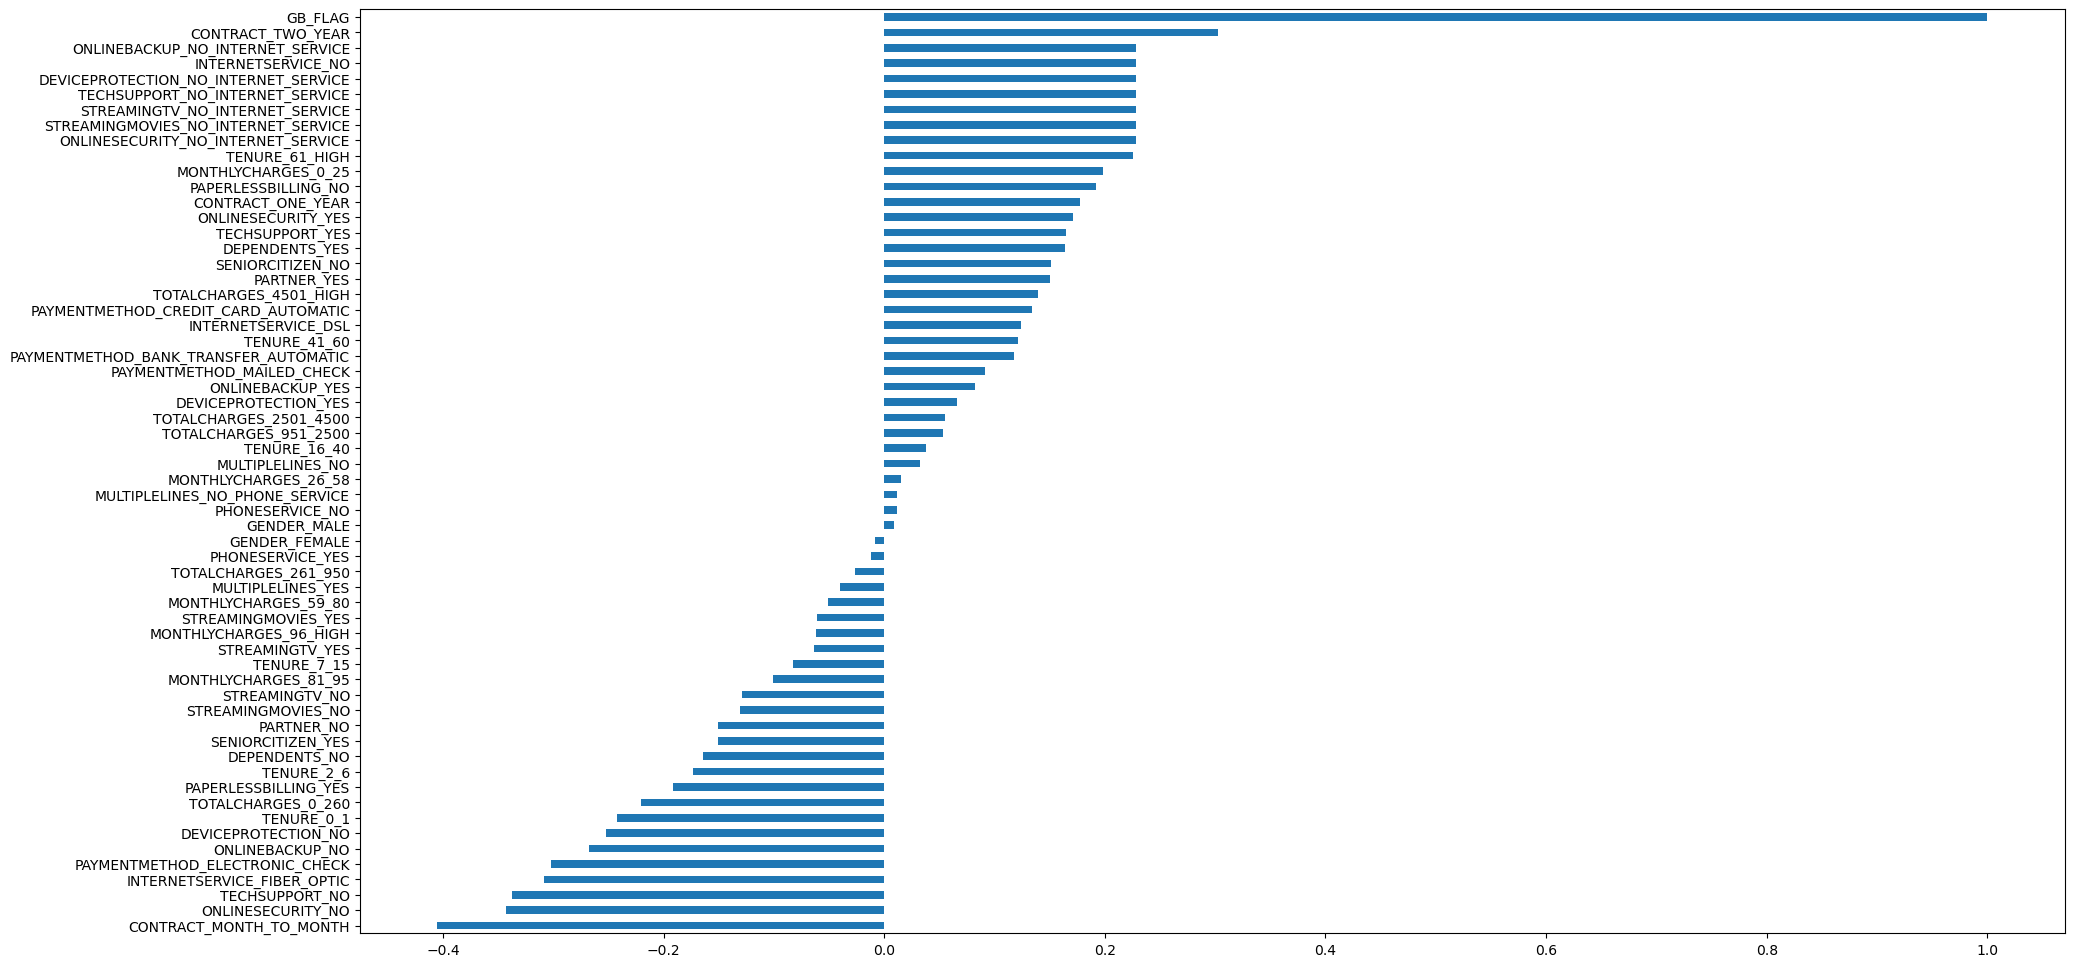

In [23]:
# Explore Correlation
## Plot Correlation
plt.figure(figsize=(22,12))
model_data.corr()[dependant_flag].sort_values(ascending = True).plot(kind='barh')
plt.show()

In [24]:
#Export Current Data Frame
model_data.to_csv(f"{folder_paths.path}/data_preprocessed.csv", index=True)